# Explore here

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, SplineTransformer
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

In [2]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [2]:
numerical_col = ["age","duration","campaign", "pdays","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
categorical_col = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
target = "y"

Univariate Data Analysis

EDA for the columns age
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
Are there missing values for age?
0
The coefficent of variations is 26.037463154004527 %


Text(0, 0.5, 'Boxplot')

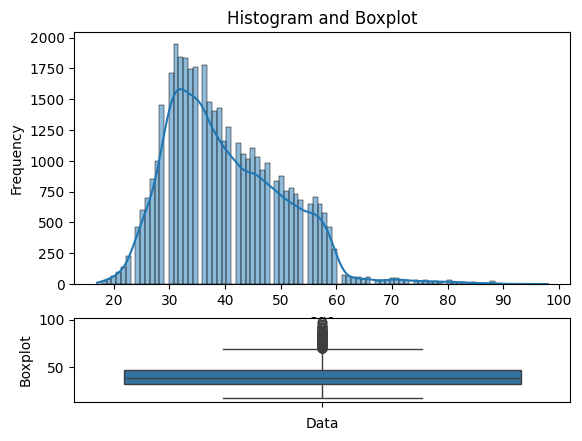

In [7]:
col = 0
print(f"EDA for the columns {numerical_col[col]}")
print(df[numerical_col[col]].describe())
print(f"Are there missing values for {numerical_col[col]}?")
print(df[numerical_col[col]].isna().sum())
q25 = df[numerical_col[col]].quantile(0.25)
q75 = df[numerical_col[col]].quantile(0.75)
IQR = q75-q25
df[numerical_col[col]+"_lower_outliers"] = np.where(df[numerical_col[col]] <q25-3*IQR, 1, 0 )
df[numerical_col[col]+"_upper_outliers"] = np.where(df[numerical_col[col]] <q75-3*IQR, 1, 0 )
print(f"The coefficent of variations is {100*df[numerical_col[col]].std()/df[numerical_col[col]].mean()} %")

#Figure and axis
fig, (ax1, ax2) = plt.subplots(2,1, sharex= False, gridspec_kw={'height_ratios': [3,1]})

sns.histplot(df[numerical_col[col]],kde=True,ax=ax1)
ax1.set_title('Histogram and Boxplot')
ax1.set_ylabel('Frequency')

sns.boxplot(df[numerical_col[col]],ax=ax2)
ax2.set_xlabel('Data')
ax2.set_ylabel('Boxplot')


#print(f"\nVisually investigate outliers")
#plt.boxplot(df[numerical_col[col]])
#print(f"\nVisually plot histogram")
#plt.hist(df[numerical_col[col]])

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_lower_outliers,age_upper_outliers
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0


In [ ]:
for categorical_col in range(len(categorical_col)):
    df[categorical_col[col]]